In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and View Data

In [2]:
artists = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')
artists.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


# Exploratory Data Analysis
## Race

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Native Hawaiian or Other Pacific Islander'),
  Text(3, 0, 'American Indian or Alaska Native'),
  Text(4, 0, 'White')])

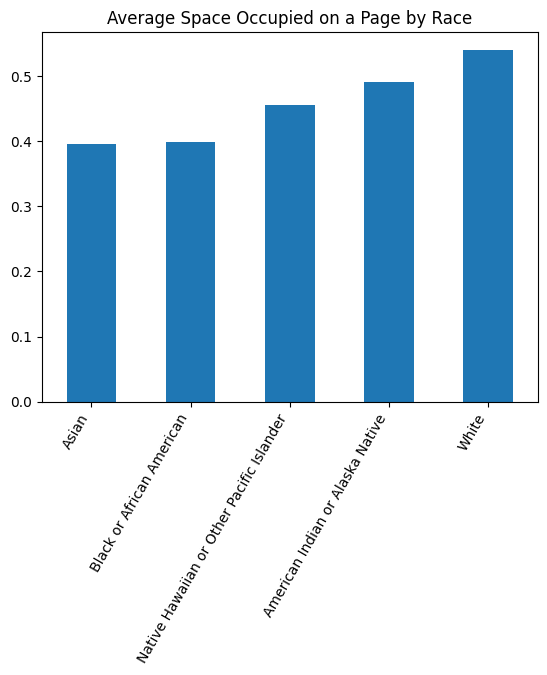

In [44]:
artists.pivot_table(values= "space_ratio_per_page_total", index = "artist_race").sort_values("space_ratio_per_page_total").plot(kind = "bar", legend=None)
plt.title("Average Space Occupied on a Page by Race")
plt.xlabel("")
plt.xticks(rotation = 60, ha = "right")

In [80]:
countdf = artists.dropna().groupby(["artist_race","artist_name"])["artist_name"].count().reset_index(name = "count")
max_countdf = countdf.groupby(["artist_race"]).agg("max").reset_index().sort_values("count", ascending=False)

Text(0.5, 1.0, 'Most Popular Artist by Race')

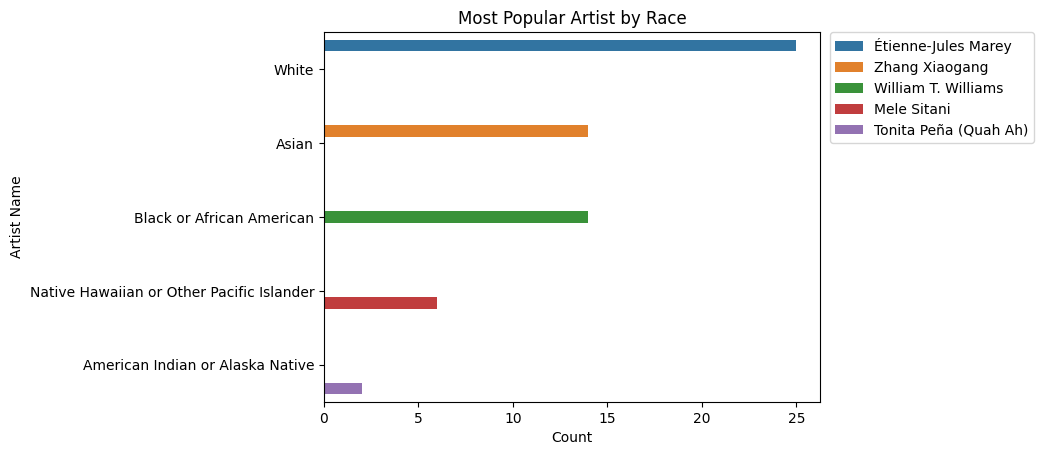

In [85]:
sns.barplot(x = "count", y = "artist_race", data = max_countdf, hue = "artist_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Count")
plt.ylabel("Artist Name")
plt.title("Most Popular Artist by Race")